## **Introduction**

In this jupyter notebook, we will discuss how to create a neural network of your own using pytorch.

Quick revision:

* A neural network incorporates a similar working like a human brain because it uses the representation of neurons in its structure.

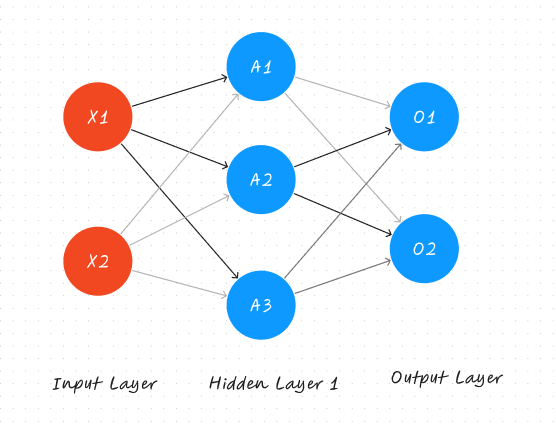

* This figure shows a sample architecture of a neural network.
* It contains mainly three layers:
    * Input layer: It contains n neurons such that you have n features which will be used as predictors.
    * Hidden layer: Hidden layers can contain n-hidden layers. It depends how complex structure you want to build.
    * Output Layer: Output layer contains n neurons according to the n-classes or the type of problem we are solving. 
    
**Number of layers: n-hidden layers + output layer (we exclude the input layer as it performs no computation)**

Figure down below will explain the basic working of a neurons. 
    
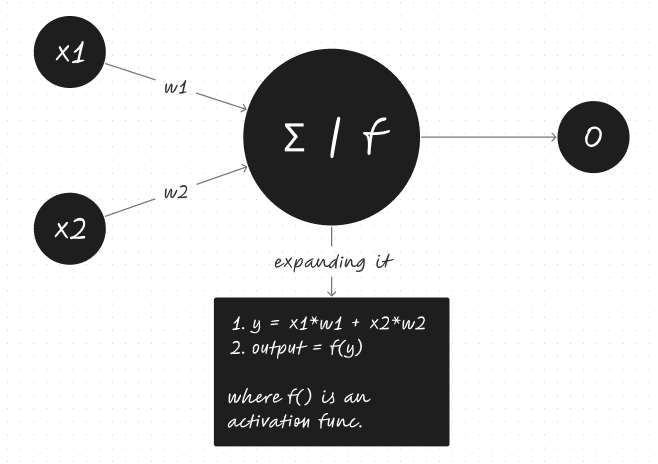

If you want to learn more about activation functions [click here](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)

**Let's focus on building a neural network using torch!**

## **Importing the dataset**

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pick a manual seed for randomization
torch.manual_seed(41)

In [3]:
# reading the csv file
df = pd.read_csv("/kaggle/input/gender-classification-dataset/gender_classification_v7.csv")
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
# getting the number of rows and columns in the dataset
df.shape

(5001, 8)

In [5]:
# since gender is the target column
# getting the number of unique classes in the target column
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
# since neural network works with numerical data,it cannot predict a string or character
# let's replace the two classes with a numerical representation
df['gender'] = df['gender'].replace('Male',0.0)
df['gender'] = df['gender'].replace('Female',1.0)

In [7]:
# separating the predictors and the target column
X = df.drop('gender',axis=1).values
y = df['gender'].values

In [8]:
# splitting the dataset using train_test_split 
# train:test = 80:20
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [9]:
# converting train and test set to float tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

## **Defining the Neural Network**

In [10]:
# importing the required libraries
import torch.nn as nn
import torch.nn.functional as functional
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

* **torch.nn** : contains different classess that help you build neural network models
* **torch.nn.functional**: contains predefined activation functions. Such that you don't want to define it on your own.

In [11]:
# creating a model class that inherits nn.Module
# nn.Module is the base class for all the neural networks

class Model(nn.Module):
    
    # defining the constructor
    # let's have two hidden layers with 4 and 5 neurons by default (if argument not passed)
    def __init__(self,in_features,h1=4,h2=5, out_features=1):
        # calling the base class constructor
        super().__init__()
        
        # nn.Linear : performs feedforward computation (y = w1*x1 + w2*x2 + b)
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        
        
    # defining the function to perform feedforward
    def forward(self, x):
        # using relu activation function in the hidden layers 
        # and sigmoid in the output layer
        x = functional.relu(self.fc1(x))
        x = functional.relu(self.fc2(x))
        x = functional.sigmoid(self.out(x))
        
        # returning the output
        return x

## **Setting the hyperparameters and optimizer**

In [12]:
# create an instance of Model class
model = Model(in_features=X_train.shape[1],h1=5,h2=8,out_features=1)

In [13]:
# choose an optimizer and set the learning rate
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [14]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=7, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=1, bias=True)
)>

In [15]:
y_train = y_train.unsqueeze(1)

## **Training the model**

After preparing the dataset and defining the neural network's structure, comes the training.

This includes steps such as:
* Feedforwarding: linear computation
* Loss Computation
* Backpropagation: updating the model parameters (weights) to reduce the loss

In [16]:
# train the model
epochs = 70
# defining a list to store the loss value at every epoch
losses = []
for i in range(1,epochs+1):
    # 1. feedforwarding
    y_pred = model.forward(X_train)

    # 2. loss computation
    loss = functional.binary_cross_entropy(y_pred,y_train)
    
    # storing the loss
    losses.append(loss.detach().numpy())
    
    #print every 10 epochs
    if i % 10 == 0:
        print(f"Epoch: {i} and loss: {loss}")
        
    #3. backpropagation
    
    # Sets gradients of all model parameters to zero.
    optimizer.zero_grad() 
    
    # computes the dloss/dw of every parameter w
    loss.backward()
    
    # updating the parameters based on the current gradient calculated
    optimizer.step()

Epoch: 10 and loss: 0.6615192890167236
Epoch: 20 and loss: 0.570788562297821
Epoch: 30 and loss: 0.39670801162719727
Epoch: 40 and loss: 0.22225087881088257
Epoch: 50 and loss: 0.1294773668050766
Epoch: 60 and loss: 0.10113349556922913
Epoch: 70 and loss: 0.0929696261882782


## **Evaluating the model**

**Let's assess the reduction of loss by plotting a curve.**

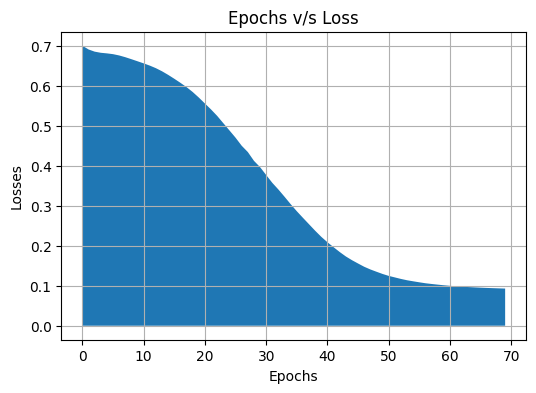

In [24]:
# plotting the curve between epochs v/s losses
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)
l = ax.fill_between(range(epochs), losses)

# setting the labels and the title
ax.set_xlabel('Epochs')
ax.set_ylabel('Losses')
ax.set_title('Epochs v/s Loss')

ax.grid('on')

In [18]:
# getting the predictions
y_pred = model.forward(X_test)
y_pred

tensor([[0.9685],
        [0.3037],
        [0.9971],
        ...,
        [0.9979],
        [0.0150],
        [0.4774]], grad_fn=<SigmoidBackward0>)

In [19]:
# y_test is a 1d row vector with 0s and 1s
y_test

tensor([1., 1., 1.,  ..., 1., 0., 1.])

In [20]:
# updating y_pred values as 0s and 1s on the bases of threshold 0.5
y_pred = np.array([1 if x>=0.5 else 0 for x in y_pred.detach().numpy()])[np.newaxis]

In [21]:
y_pred.shape

(1, 1001)

In [22]:
# reshaping the y_pred as 1d row vector
y_pred = y_pred.reshape(1001,)
y_pred

array([1, 0, 1, ..., 1, 0, 0])

In [23]:
# computing the accuracy of our model
accuracy_score(y_pred,y_test)

0.945054945054945

## **Conclusion**

You learnt:
* basic Dataset preparation
* to define your custom neural network class using torch
* to perform training using torch modules.
* finally basic evaluation

I will be covering more approaches using torch in upcoming notebooks. If you have any suggestions, do let me know in the comments.